# Unicorn Companies Project : Exploratory Data Analysis

### L'objectif


L'objectif de ce projet est de mener une analyse exploratoire des données sur un ensemble de données d'entreprises Unicorns.

### Le but

L'objectif est d'explorer l'ensemble des données et de créer des visualisations.
Cette activité comporte 3 parties :

**Partie 1:** Exploration des données

* Nettoyage des données

**Partie 2:** Création de visualisations

**Partie 3:** Évaluer les résultats

In [32]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import numpy as np

## Data Exploration & Cleaning

In [3]:
data = pd.read_csv('unicorn-companies/Unicorn_Companies.csv')
data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


### Data overview and summary statistics

In [4]:
data.shape

(1074, 10)

L'ensemble de données comporte 1074 lignes et 10 colonnes. Selon cet ensemble de données, il y a 1074 entreprises Unicorn en mars 2022 et 10 aspects de chaque entreprise.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


Les colonnes City et Select Investors contiennent moins de valeurs non nulles que le nombre total de lignes de l'ensemble de données, ce qui indique qu'il s'agit de valeurs manquantes.

In [6]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country                     object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [7]:
data.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


L'entreprise la plus ancienne de la liste a été fondée en 1919. Il s'agit de la valeur minimale de la colonne Année de création

La valeur maximale dans la colonne Année de création est 2021. Cela signifie que cet ensemble de données ne comprend pas de données sur les entreprises Unicorne fondées après 2021.

In [8]:

data['Year Joined'] = data['Date Joined'].dt.year
data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [9]:
def to_num(x):
    if x == 'Unknown':
        x = 0
    elif x[-1]== 'B' :
        x = x.strip('$B')
        x = int(x)
    elif x[-1]== 'M' :
        x = float(int(x.strip('$M'))*0.001)
    return x
    

In [10]:
data['Valuation'] = data['Valuation'].apply(to_num)
data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


In [11]:
data['Funding'] = data['Funding'].apply(to_num)
data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011


In [12]:
data[['Valuation', 'Funding']].describe().T

,count,mean,std,min,25%,50%,75%,max
Valuation,1074.0,3.455307,8.547022,1.0,1.000,2.000,3.000,180.0
Funding,1074.0,0.551043,0.807719,0.0,0.218,0.365,0.603,14.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   int64         
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country           1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   float64       
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 92.4+ KB


75 % des entreprises ont une valeur inférieure ou égale à 3B$

### Find missing value

In [14]:
data.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
Year Joined          0
dtype: int64

Il y a une seule valeur manquante dans la colonne "Select Investors" et 16 villes manquantes. Il n'y a pas de valeurs manquantes dans les autres colonnes.

### Review rows with missing values

In [15]:
mask = data.isna()
mask.tail()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
1069,False,False,False,False,False,False,False,False,False,False,False
1070,False,False,False,False,False,False,False,False,False,False,False
1071,False,False,False,False,False,False,False,False,False,False,False
1072,False,False,False,False,False,False,False,False,False,False,False
1073,False,False,False,False,False,False,False,False,False,False,False


In [16]:
mask = mask.any(axis=1)
mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [17]:
data_missing_rows = data[mask]
data_missing_rows

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
12,FTX,32,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2.000,"Sequoia Capital, Thoma Bravo, Softbank",2021
170,HyalRoute,4,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,0.263,Kuang-Chi,2020
242,Moglix,3,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,0.471,"Jungle Ventures, Accel, Venture Highway",2021
251,Trax,3,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1.000,"Hopu Investment Management, Boyu Capital, DC T...",2019
325,Amber Group,3,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,0.328,"Tiger Global Management, Tiger Brokers, DCM Ve...",2021
382,Ninja Van,2,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,0.975,"B Capital Group, Monk's Hill Ventures, Dynamic...",2021
541,Advance Intelligence Group,2,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,0.536,"Vision Plus Capital, GSR Ventures, ZhenFund",2021
629,LinkSure Network,1,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,0.052,NaN,2015
811,Carousell,1,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,0.288,"500 Global, Rakuten Ventures, Golden Gate Vent...",2021
848,Matrixport,1,2021-06-01,Fintech,NaN,Singapore,Asia,2019,0.100,"Dragonfly Captial, Qiming Venture Partners, DS...",2021


In [18]:
data_missing_rows.shape

(17, 11)

13 des 17 lignes avec des valeurs manquantes concernent des entreprises de Singapour

### Fill null values

In [19]:
values = {"City": "Not Listed", "Select Investors": "Not Listed"}
data = data.fillna(value=values)
data.shape

(1074, 11)

### Check any misspelling

In [20]:
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

set(data['Industry']) - set(industry_list)

{'Artificial Intelligence'}

In [21]:
replacement_dict = {'Artificial Intelligence' : 'Artificial intelligence'}
data["Industry"] = data["Industry"].replace(replacement_dict)
set(data['Industry']) - set(industry_list)

set()

### Handling duplicate raws

Les entreprises dupliquées ne sont pas légitimes parce qu'elles ne sont manifestement pas des entreprises différentes portant le même nom. Il s'agit de la même entreprise représentée deux fois avec des variations mineures.

In [22]:
data[data.duplicated(subset=['Company'], keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
40,Bolt,11,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,1.0,"Didi Chuxing, Diamler, TMT Investments",2018
44,Bolt,11,2021-10-08,Fintech,San Francisco,United States,North America,2014,1.0,"Activant Capital, Tribe Capital, General Atlantic",2021


In [23]:
data = data.drop_duplicates(subset=['Company'], keep='first')

### Check inconsistent data

In [24]:
data[data['Year Joined'] < data['Year Founded']]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,0.151,"Phoenix New Media, Tianjin Haihe Industry Fund",2017


L'année d'adhésion d'une entreprise ne doit pas être antérieure à l'année de sa création.

Une recherche sur internet révèle que Yidian Zixun a été fondée en 2013. Remplace la valeur de l'année de création par 2011 pour la ligne de Yidian Zixun.

In [25]:
data.loc[data['Company']=='Yidian Zixun', 'Year Founded'] = 2013
data[data['Company']=='Yidian Zixun']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
714,Yidian Zixun,1,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2013,0.151,"Phoenix New Media, Tianjin Haihe Industry Fund",2017


## Visualization

In [26]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita...",2011


### Visualize the number of unicorn companies across the years.

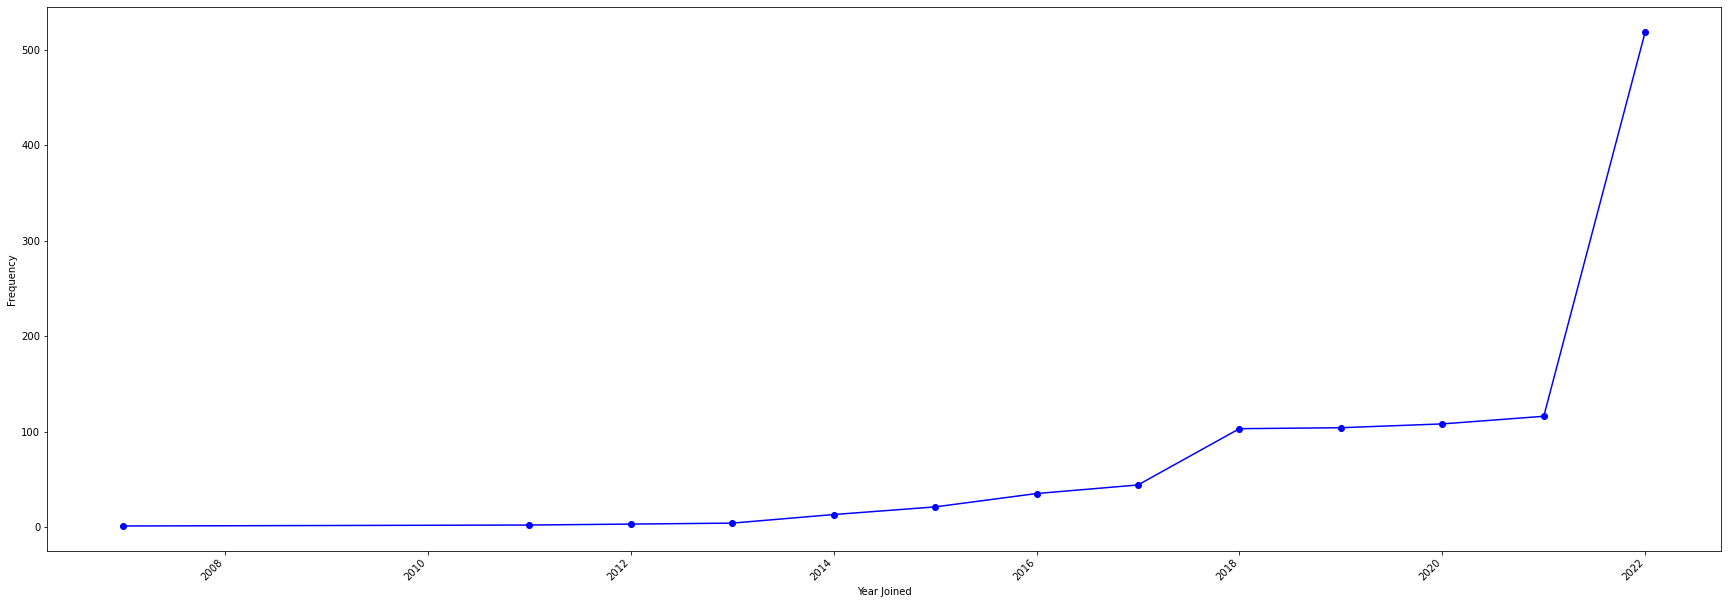

In [27]:
plt.figure(figsize=(30, 10))
plt.plot(data['Year Joined'].sort_values().unique(), data['Year Joined'].value_counts().sort_values(), marker='o', linestyle='-', color='b', label='Line Chart')
plt.xlabel('Year Joined')
plt.ylabel('Frequency')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

### Visualize the number of companies by industry

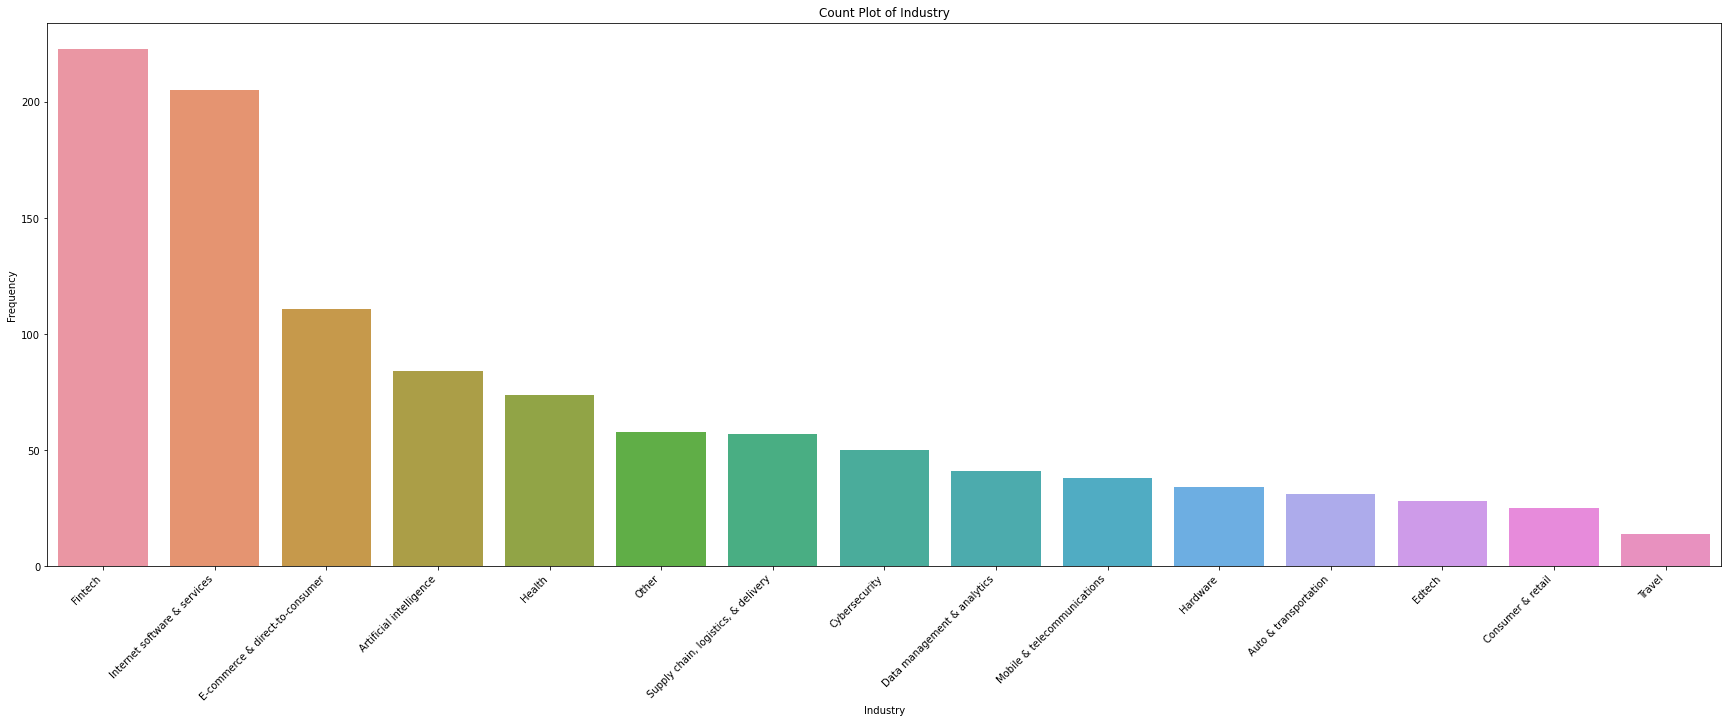

In [27]:
plt.figure(figsize=(30, 10))
sns.countplot(data=data, x='Industry', order=data['Industry'].value_counts().index)
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title(f'Count Plot of Industry')
plt.show()

La plupart des entreprises sont dans les secteurs de la Fintech et des logiciels et services internet. Moins d'entreprises se trouvent dans les secteurs du voyage, de la consommation et de la vente au détail.

### Visualize the valuation of top 50 companies

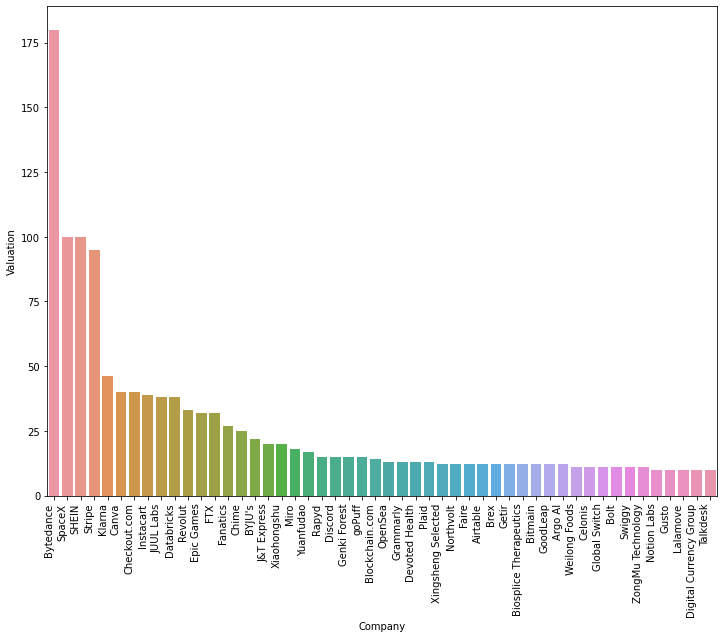

In [28]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90, horizontalalignment='right')
sns.barplot(x = 'Company', y= 'Valuation', data = data.sort_values(by='Valuation', ascending=False)[:50])
plt.show()

### Visualize the funding of top 50 companies

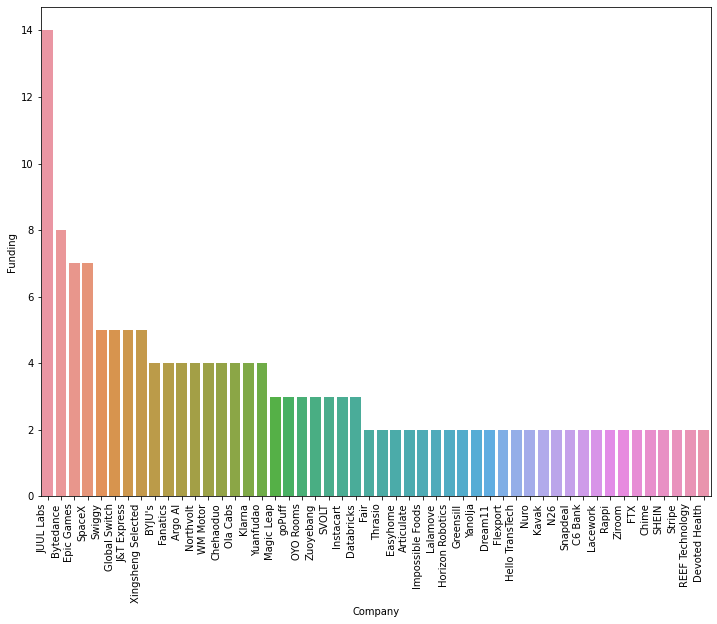

In [29]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90, horizontalalignment='right')
sns.barplot(x = 'Company', y= 'Funding', data = data.sort_values(by='Funding', ascending=False)[:50])
plt.show()

### Visualize the proportion of Funding to Valuation (top 50 companies valuation)

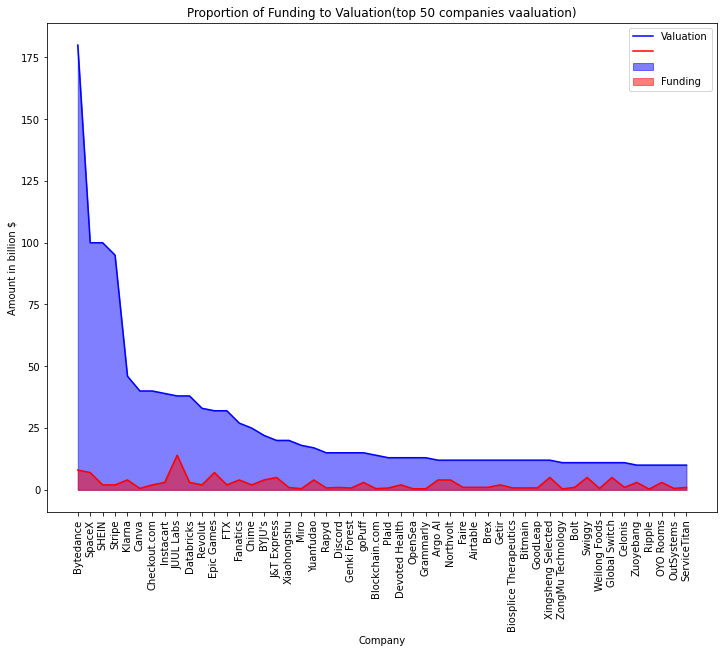

In [65]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.lineplot(data = data[:50], x = data
             ['Company'][:50], y = data['Valuation'][:50] ,color="b")
sns.lineplot(data = data[:50], x = data['Company'][:50], y = data['Funding'][:50] ,color="r")

plt.title('Proportion of Funding to Valuation(top 50 companies vaaluation)')
plt.ylabel('Amount in billion $')
plt.fill_between(data['Company'][:50], data['Valuation'][:50], color="blue", alpha=0.5)
plt.fill_between(data['Company'][:50], data['Funding'][:50], color="red", alpha=0.5)
plt.legend(labels=['Valuation','','','Funding'])
plt.show()

### Visualize the number of Unicorns per country

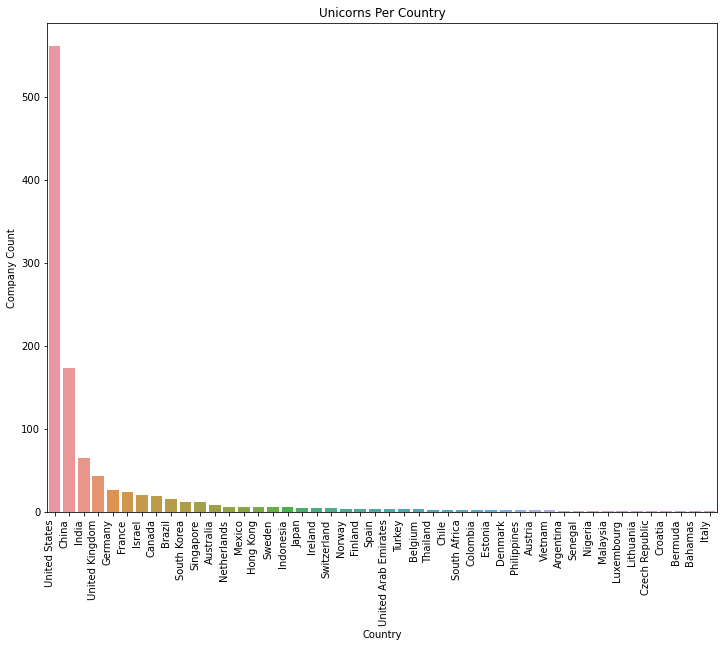

In [38]:
plt.figure(figsize=(12,9))
sns.barplot(x = 'Country', y= 'Company', data = data.groupby('Country')['Company'].count().sort_values(ascending=False).reset_index())
plt.xlabel('Country')
plt.ylabel('Company Count')
plt.title('Unicorns Per Country')
plt.xticks(rotation=90, horizontalalignment='right')
plt.show()

### Visualize the Top 50 Unicorns per city

C:\Users\Ryma-\AppData\Local\Temp/ipykernel_10160/1661193412.py:3: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only
  sns.barplot(x = 'City', y= 0, data = data.groupby('City').size().sort_values(0, ascending=False).reset_index()[:50])


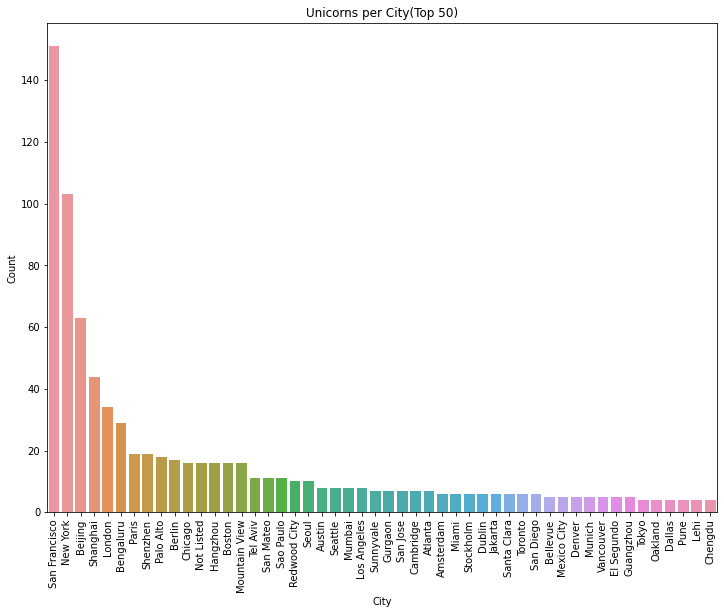

In [41]:
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(x = 'City', y= 0, data = data.groupby('City').size().sort_values(0, ascending=False).reset_index()[:50])
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Unicorns per City(Top 50)')
plt.show()

### Visaulize the fastest company to acheive unicorn status

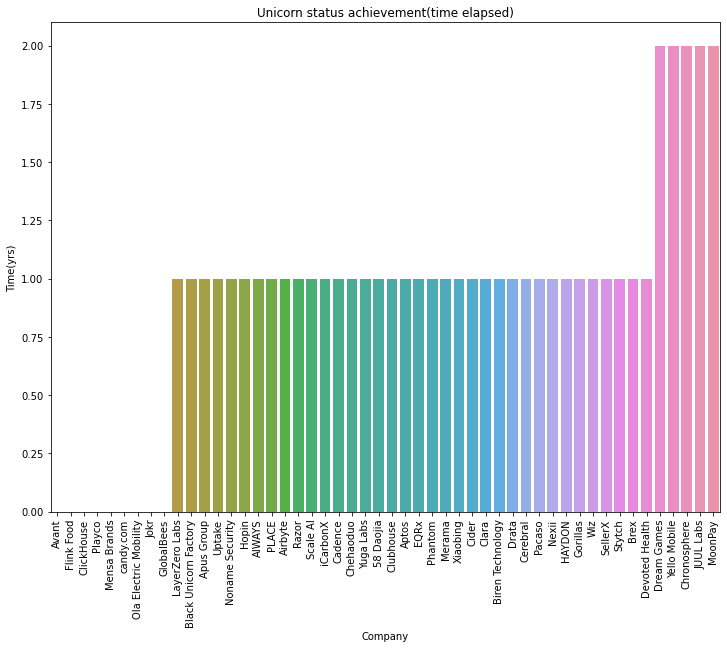

In [63]:
#Fastest to achieve unicorn status (company)
#0 yrs representing within months
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(x = 'Company', y= 'Years To Unicorn', data = data[['Company', 'Years To Unicorn']].sort_values('Years To Unicorn').reset_index()[:50])
plt.xlabel('Company')
plt.ylabel('Time(yrs)')
plt.title('Unicorn status achievement(time elapsed)')
plt.show()

In [ ]:
# Investors, Total Worth Investments Top 50
plt.figure(figsize=(12,9))
plt.xticks(rotation=90)
sns.barplot(x = 'investor', y= 'valuation', data = data.groupby("investor")['valuation'].sum().sort_values('valuation', ascending=False).reset_index()[:50])
plt.xlabel('Investors')
plt.ylabel('Amount(billion $)')
plt.title('Total Worth Investments (Investors, top 50)')
plt.show()

Text(0, 0.5, 'Frequency')

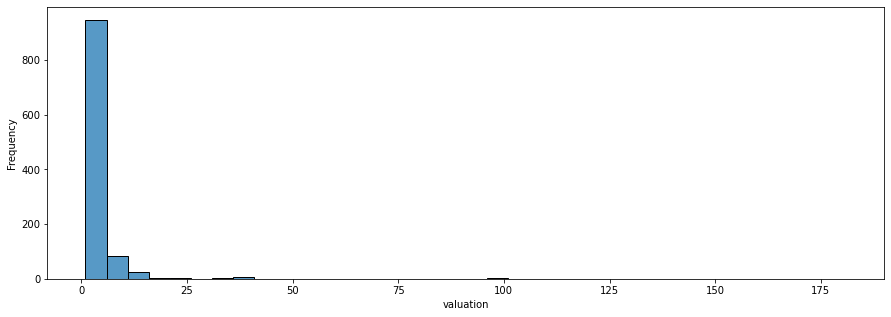

In [28]:
plt.figure(figsize=(15, 5))
sns.histplot(data['Valuation'], bins=range(1,186,5))
plt.xlabel('valuation')
plt.ylabel('Frequency')

### Visualize average years till unicorn for each industry

In [43]:
data['Years To Unicorn'] = data['Year Joined'] - data['Year Founded']
grouped = data[['Industry', 'Years To Unicorn']].groupby('Industry').mean().sort_values(by='Years To Unicorn')
grouped

,Years To Unicorn
Industry,
Auto & transportation,5.032258
Artificial intelligence,5.892857
Hardware,5.941176
E-commerce & direct-to-consumer,6.432432
Mobile & telecommunications,6.526316
Fintech,6.542601
Travel,6.571429
Cybersecurity,6.800000
"Supply chain, logistics, & delivery",6.929825


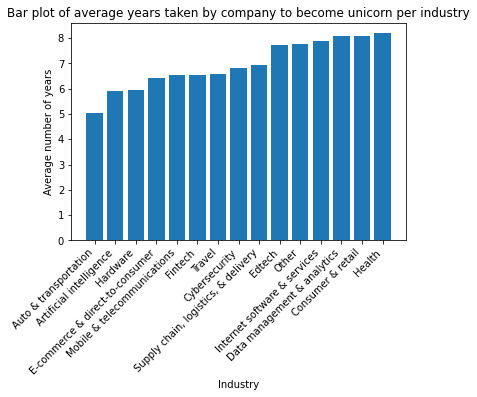

In [48]:
plt.bar(grouped.index, grouped["Years To Unicorn"])
plt.title("Bar plot of average years taken by company to become unicorn per industry")

plt.xlabel("Industry")
plt.ylabel("Average number of years")

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

la valeur la plus élevée pour le temps moyen nécessaire pour devenir une licorne a été enregistrée dans les secteurs de la santé, de la consommation et de la vente au détail et de la gestion des données et de l'analyse, tandis que la valeur la plus faible a été enregistrée dans le secteur de l'automobile et des transports.

### Visualize the average unicorn company valuation per industry

In [31]:
grouped = data[['Industry', 'Valuation']].groupby('Industry').mean().sort_values(by='Valuation', ascending=False)
grouped

,Valuation
Industry,
Artificial intelligence,4.488095
Other,4.344828
Consumer & retail,4.240000
Fintech,3.905830
E-commerce & direct-to-consumer,3.837838
Edtech,3.571429
Data management & analytics,3.317073
Travel,3.285714
Auto & transportation,3.193548


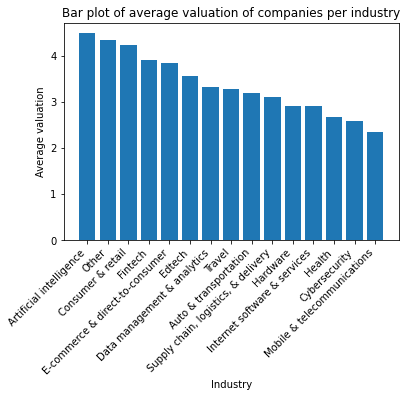

In [32]:
plt.bar(grouped.index, grouped["Valuation"])
plt.title("Bar plot of average valuation of companies per industry")

plt.xlabel("Industry")
plt.ylabel("Average valuation")

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

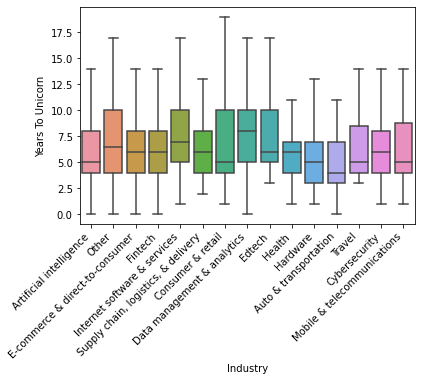

In [33]:
sns.boxplot(x=data['Industry'], 
            y=data['Years To Unicorn'],
            showfliers=False)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

### Visualize the time it took companies to become unicorns

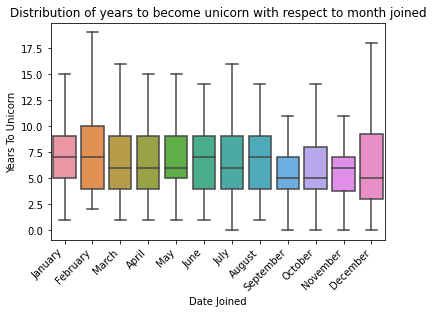

In [34]:
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

sns.boxplot(x=data['Date Joined'].dt.month_name(), 
            y=data['Years To Unicorn'], 
            order=month_order, 
            showfliers=False)

plt.title('Distribution of years to become unicorn with respect to month joined')

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

Dans le boxplot, la valeur médiane du nombre d'années avant l'adhésion est différente pour chaque mois. De plus, la valeur médiane du nombre d'années avant l'adhésion est inférieure pour les mois de septembre et d'octobre. Cela pourrait indiquer que les entreprises qui ont atteint le statut de Unicorn au début de l'automne ont mis moins de temps à atteindre une valorisation d'un milliard de dollars. Cela s'explique par le fait que le nombre d'entreprises est relativement proche/consistant pour chaque mois. Si ce n'était pas le cas, il serait trompeur de comparer les valeurs médianes des diagrammes en boîte d'un mois à l'autre.

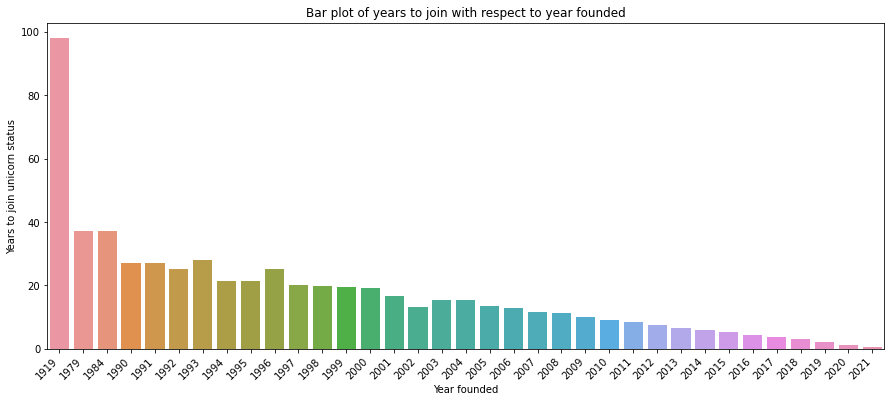

In [36]:

plt.figure(figsize=(15,6))

sns.barplot(x=data["Year Founded"], y=data["Years To Unicorn"], ci=False)

plt.title("Bar plot of years to join with respect to year founded")

plt.xlabel("Year founded")

plt.ylabel("Years to join unicorn status")

plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

### Get insight from year 2021

Obtenez plus d'informations sur l'année 2021, car il s'agit de l'année la plus récente pour laquelle des données sont disponibles. En outre, les tendances qui ont eu lieu en 2021 peuvent être similaires à celles qui auront lieu en 2022.

In [53]:
mask = (data['Year Joined']==2021)
companies_2021 = data[mask]
companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Years To Unicorn
12,FTX,32,2021-07-20,Fintech,Not Listed,Bahamas,North America,2018,2.000,"Sequoia Capital, Thoma Bravo, Softbank",2021,3
16,J&T Express,20,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,5.000,"Hillhouse Capital Management, Boyu Capital, Se...",2021,6
24,Blockchain.com,14,2021-02-17,Fintech,London,United Kingdom,Europe,2011,0.490,"Lightspeed Venture Partners, Google Ventures, ...",2021,10
27,OpenSea,13,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,0.427,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,4
34,Getir,12,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,2.000,"Tiger Global Management, Sequoia Capital, Revo...",2021,6


In [54]:
companies_2021.shape

(519, 12)

### Observe trends over time

In [57]:
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

companies_by_week_2021.head()


,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Compare trends over time

comparer l'évolution dans le temps de la valorisation moyenne des entreprises devenues Unicron entre les années 2020 et 2021.

In [58]:
companies_2021.head()

,Company,Valuation,Date Joined,Week Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,Year Joined,Years To Unicorn
12,FTX,32,2021-07-20,2021-W29,Fintech,Not Listed,Bahamas,North America,2018,2.000,"Sequoia Capital, Thoma Bravo, Softbank",2021,3
16,J&T Express,20,2021-04-07,2021-W14,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,5.000,"Hillhouse Capital Management, Boyu Capital, Se...",2021,6
24,Blockchain.com,14,2021-02-17,2021-W07,Fintech,London,United Kingdom,Europe,2011,0.490,"Lightspeed Venture Partners, Google Ventures, ...",2021,10
27,OpenSea,13,2021-07-20,2021-W29,E-commerce & direct-to-consumer,New York,United States,North America,2017,0.427,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,4
34,Getir,12,2021-03-26,2021-W12,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,2.000,"Tiger Global Management, Sequoia Capital, Revo...",2021,6


In [59]:
companies_2020 = data[data["Year Joined"] == 2020]
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().sort_values(ascending=False).reset_index().rename(columns={"Valuation":"Average Valuation"})

companies_by_quarter_2020_2021


,Quarter Joined,Average Valuation
0,2020-Q3,3.896552
1,2020-Q2,3.777778
2,2020-Q4,3.697674
3,2020-Q1,3.444444
4,2021-Q1,2.750000
5,2021-Q2,2.340278
6,2021-Q3,2.291045
7,2021-Q4,1.781955


### Visualize the number of companies that joined per interval

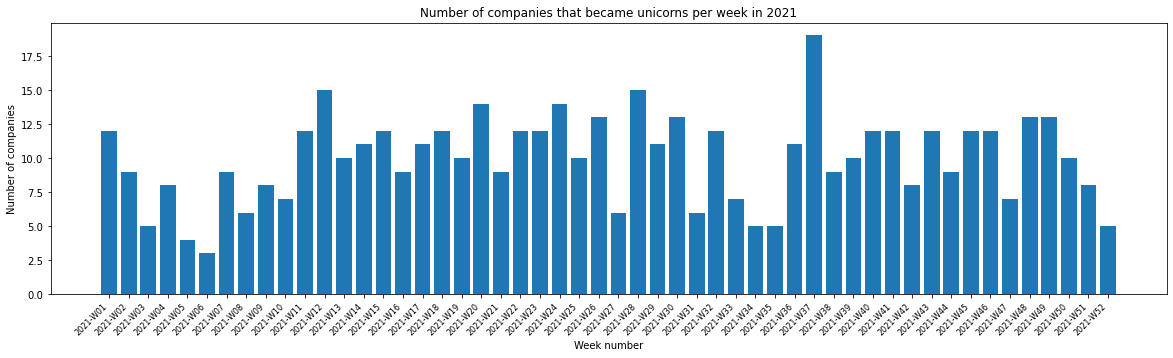

In [60]:
plt.figure(figsize = (20, 5))
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()

plt.xlabel("Week number")

plt.ylabel("Number of companies")

plt.title("Number of companies that became unicorns per week in 2021")

plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)
plt.show()

Le nombre d'entreprises ayant accédé au statut de licorne a fluctué au cours des semaines de 2021, avec une tendance à la baisse suivie d'une augmentation périodique.

Le nombre le plus élevé d'entreprises ayant atteint une valorisation d'un milliard de dollars a été enregistré au cours de la semaine 37 de 2021, qui correspond à la troisième semaine de septembre 2021.

Les semaines de 2021 au cours desquelles le nombre d'entreprises devenant des licornes est le plus élevé sont la semaine 12 (qui correspond à la quatrième semaine de mars) et la semaine 28 (qui correspond à la troisième semaine de juillet).

### Visualize the average valuation over the quarters

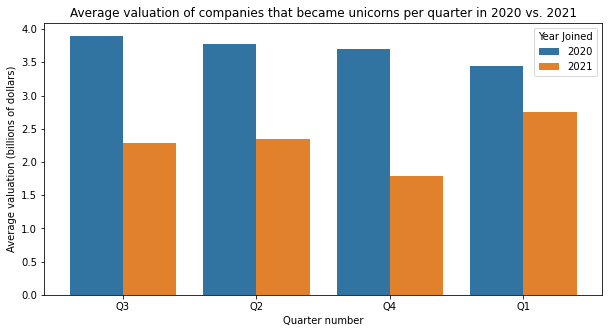

In [61]:

companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

plt.figure(figsize = (10, 5))

sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()

plt.xlabel("Quarter number")

plt.ylabel("Average valuation (billions of dollars)")

plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

plt.show()

Pour chaque trimestre, la valuation moyenne des entreprises ayant accédé au statut de licorne a été plus élevée en 2020 qu'en 2021.

En 2020, le troisième trimestre est celui où la valuation moyenne des entreprises ayant atteint le statut de licorne est la plus élevée, avec une tendance à l'augmentation du premier au deuxième trimestre et du deuxième au troisième trimestre.

En 2021, c'est au premier trimestre que l'évaluation moyenne des entreprises ayant atteint le statut de licorne est la plus élevée, et la tendance est à la baisse d'un trimestre à l'autre.

### Findings:


* Il y a 1074 entreprises licornes représentées dans cet ensemble de données.

* 2015 est l'année où le plus grand nombre d'entreprises licornes ont été fondées.

* Certaines entreprises ont mis plus de temps à atteindre le statut de licorne mais ont accumulé une valeur élevée en mars 2022. Les entreprises peuvent mettre plus de temps à atteindre le statut de licorne pour un certain nombre de raisons, notamment parce qu'elles ont besoin d'un financement plus important ou parce qu'il leur faut plus de temps pour développer un modèle d'entreprise.

* Les entreprises suivantes ont mis moins de temps à atteindre le statut de licorne (moins d'un an) : Avant, Flink Food, Click House, Playco, Mensa Brands, Candy, Ola Electric Mobility.

* Les entreprises suivantes ont la meilleure valuation : ByteDance, SpaceX, Shein, Stripe, Klama.

* Les entreprises des secteurs de l'automobile, des transports et de l'intelligence artificielle ont mis en moyenne moins d'années pour devenir des licornes.

* Le diagramme en boîte montre que les entreprises qui deviennent des licornes au cours des mois de septembre et d'octobre ont une valeur médiane plus faible pour le temps qu'il leur a fallu pour devenir des licornes.

* L'un des diagrammes à barres créés montre que l'évaluation moyenne des entreprises qui ont rejoint la licorne en 2020 est la plus élevée au troisième trimestre de l'année, tandis que l'évaluation moyenne des entreprises qui ont rejoint la licorne en 2021 est la plus élevée au premier trimestre de l'année.

### Recommendations:

Selon une analyse de données effectuée sur un ensemble de 1074 entreprises licornes, les entreprises qui se sont jointes au mois de septembre et d'octobre ont eu tendance à prendre moins de temps pour devenir des Unicorne.

Une autre constatation est qu'un grand nombre des entreprises licornes fondées en 2021 l'ont été aux États-Unis et appartiennent aux secteurs de la "Fintech", du "E-commerce & direct-to-consumer", et des "logiciels & services Internet". Par conséquent, si les parties prenantes souhaitent investir dans des entreprises fondées en 2021, il serait judicieux de considérer les entreprises qui appartiennent à ces secteurs, car elles peuvent être de bons candidats pour devenir des Unicorne.

Il a également été découvert que l'évaluation moyenne des entreprises créées en 2021 est la plus élevée au cours du premier trimestre de l'année, et que l'évaluation moyenne des entreprises créées en 2020 est au cours du troisième trimestre de l'année. Lorsque l'on étudie les entreprises qui rejoindront le marché à l'avenir, il serait intéressant d'examiner de près les entreprises qui rejoignent le marché au cours des premier et troisième trimestres de l'année.
Les données peuvent être analysées de manière plus approfondie afin de recueillir des informations plus spécifiques aux intérêts de la société d'investissement et des parties prenantes.